In [2]:
# importing libraries and modules
import wrangle

import pandas as pd
import numpy as np

from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing

import warnings
warnings.filterwarnings('ignore')

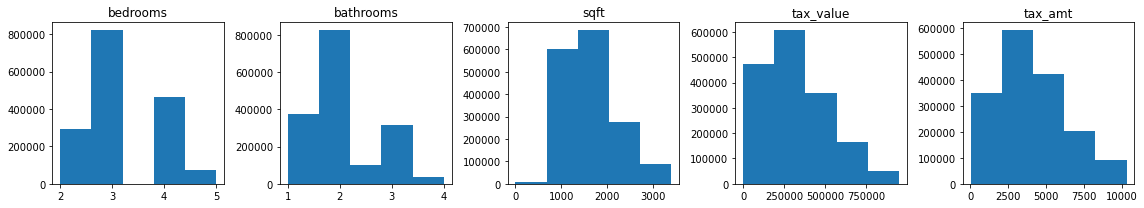

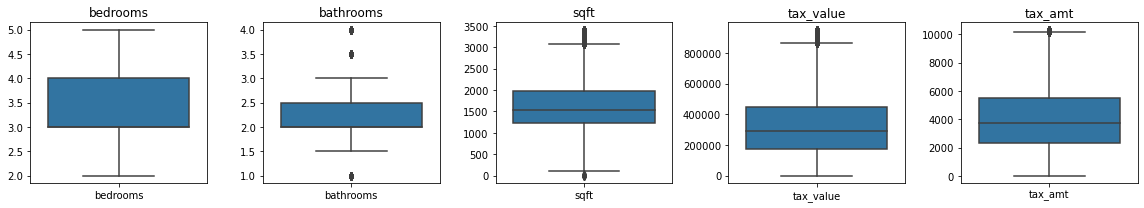

In [3]:
# acquiring prepared zillow data

train, validate, test = wrangle.wrangle_zillow()

# 1. Apply Scalers from Lesson to Data

In [12]:
# variable that holds the list of columns I want to scale
cols_to_scale = train.drop(columns = ['fips']).columns.to_list()
cols_to_scale

['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'year_built', 'tax_amt']

### Min - Max Scaler

In [14]:
# creating scaler object
mm_scaler = sklearn.preprocessing.MinMaxScaler()

In [15]:
# fitting scaler object to train dataset
mm_scaler = mm_scaler.fit(train[cols_to_scale])

In [18]:
# scaling data | train
mm_scaled_train = mm_scaler.transform(train[cols_to_scale])
# mm_scaled_train

# scaling data | validate
mm_scaled_validate = mm_scaler.transform(validate[cols_to_scale])
# mm_scaled_validate

# scaling data | test
mm_scaled_test = mm_scaler.transform(test[cols_to_scale])
# mm_scaled_test

In [61]:
# create new columns on train, validate, and test
mm_scaled_train = pd.DataFrame(mm_scaled_train, columns=cols_to_scale)
mm_scaled_train.head(2)

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt
0,0.333333,0.333333,0.405984,0.130229,0.450549,0.148722
1,0.666667,0.333333,0.459372,0.264531,0.340659,0.296314


#### Visualize Min - Max Scaler Results

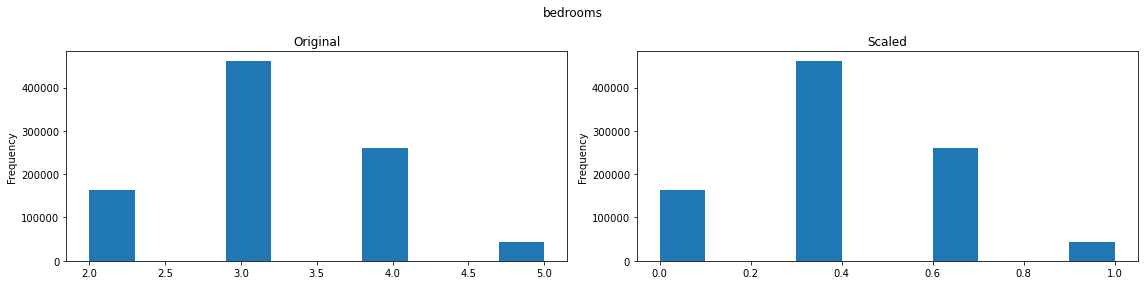

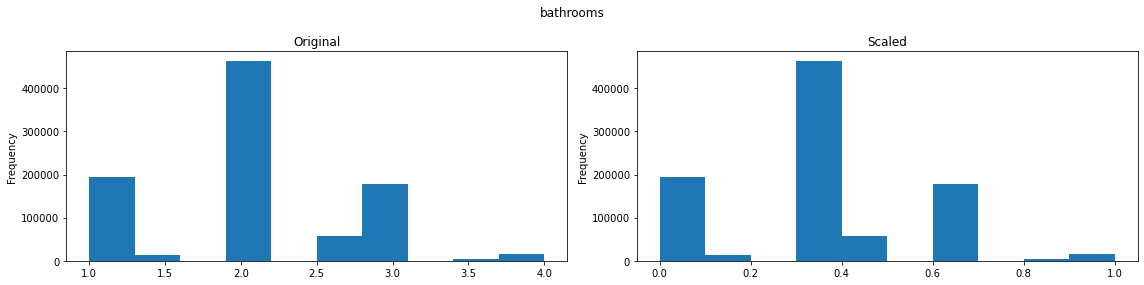

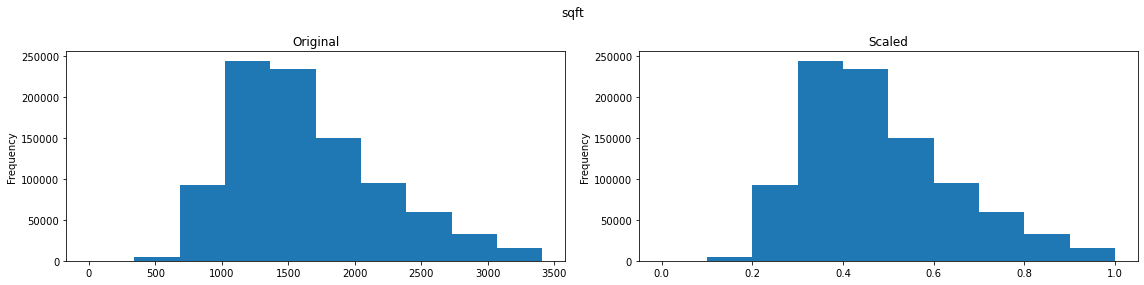

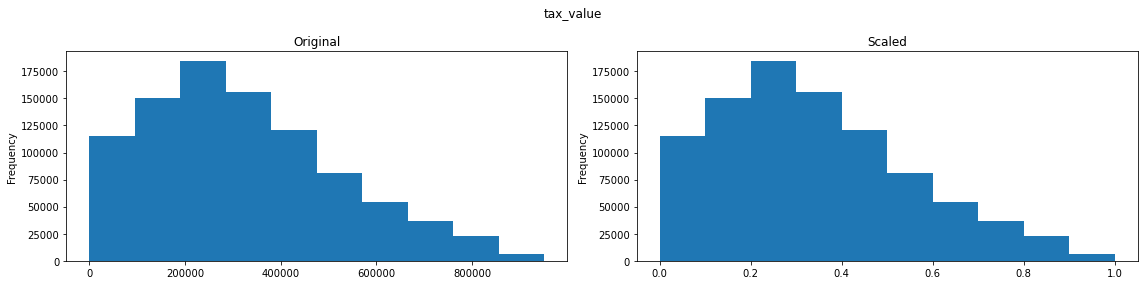

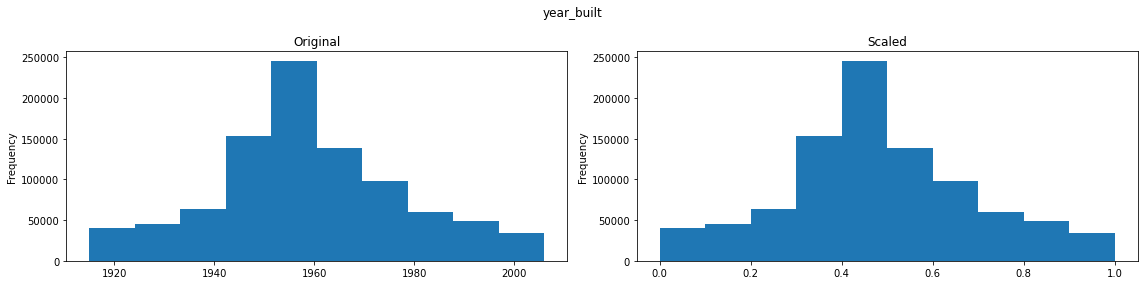

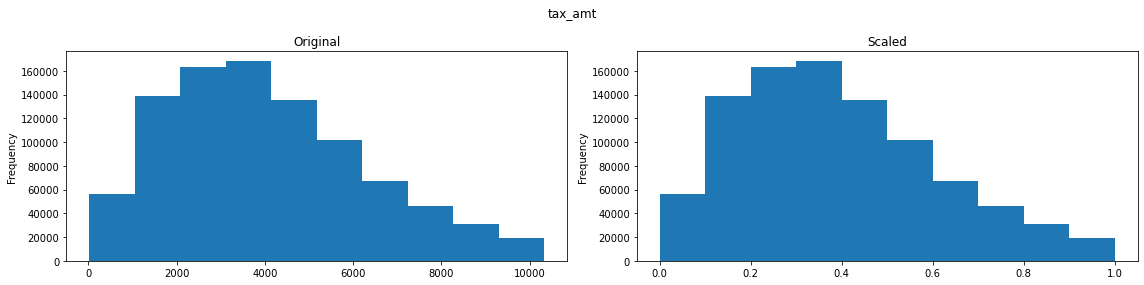

In [60]:
for col in cols_to_scale:

    plt.figure(figsize = (16, 4))
    # subplot 1
    plt.subplot(121)
    train[col].plot.hist(title = 'Original')
    
    # subplot 2
    plt.subplot(122)
    mm_scaled_train[col].plot.hist(title = 'Scaled')
    
    plt.suptitle(col)
    plt.tight_layout()
    plt.show()

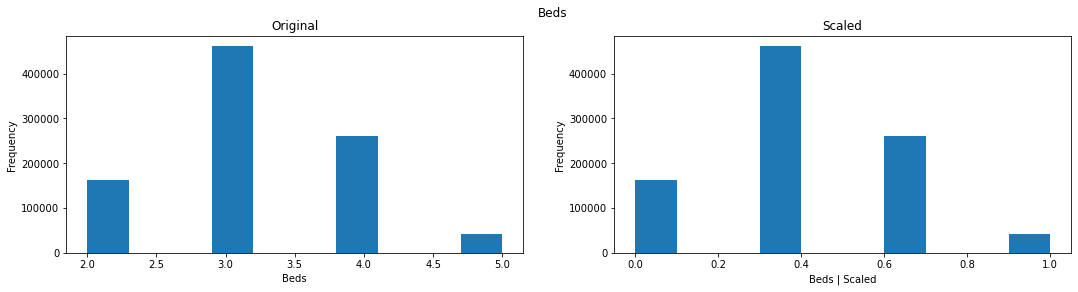

<Figure size 432x288 with 0 Axes>

In [52]:
plt.figure(figsize = (18, 4))

# subplot 1
plt.subplot(121)
train.bedrooms.plot.hist(title = 'Original')
plt.xlabel('Beds')

# subplot 2
plt.subplot(122)
scaled_train.bedrooms.plot.hist(title = 'Scaled')
plt.xlabel('Beds | Scaled')

plt.suptitle('Beds')
plt.show()
plt.tight_layout();

### Standard Scaler

In [62]:
# creating scaler object
std_scaler = sklearn.preprocessing.StandardScaler()

In [63]:
# fitting scaler object to train dataset
std_scaler = std_scaler.fit(train[cols_to_scale])

In [64]:
# scaling data | train
std_scaled_train = std_scaler.transform(train[cols_to_scale])
# std_scaled_train

# scaling data | validate
std_scaled_validate =std_scaler.transform(validate[cols_to_scale])
# stdscaled_validate

# scaling data | test
std_scaled_test = std_scaler.transform(test[cols_to_scale])
# std_scaled_test

In [65]:
# create new columns on train, validate, and test
std_scaled_train = pd.DataFrame(std_scaled_train, columns=cols_to_scale)
std_scaled_train.head(2)

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt
0,-0.253196,-0.064991,-0.455481,-1.016402,-0.163234,-1.122852
1,1.035175,-0.064991,-0.129975,-0.371135,-0.697774,-0.441142


#### Visualize Min - Max Scaler Results

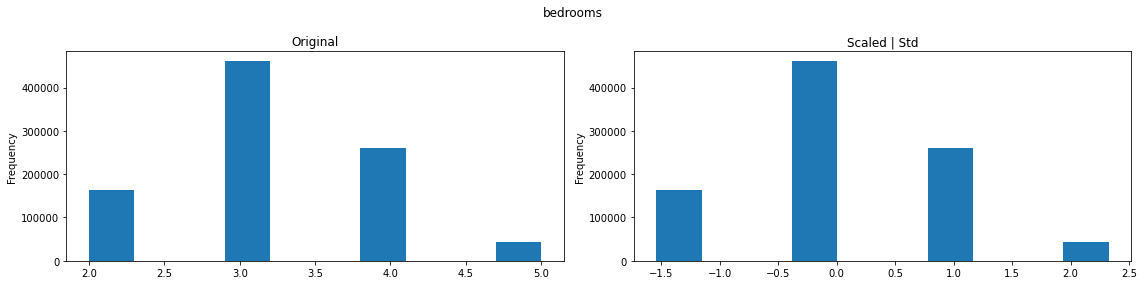

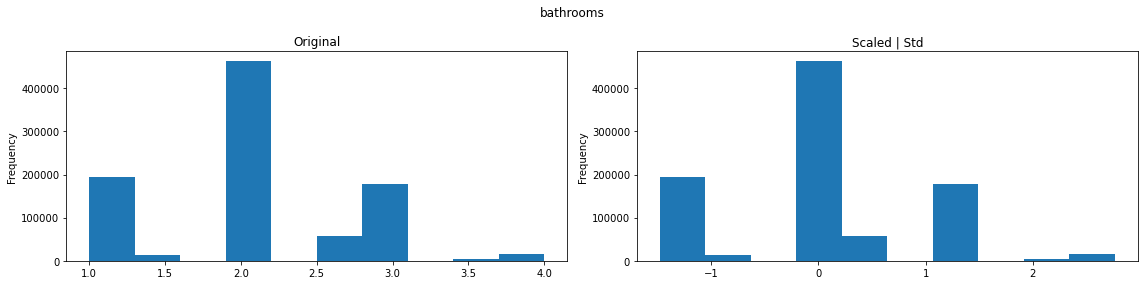

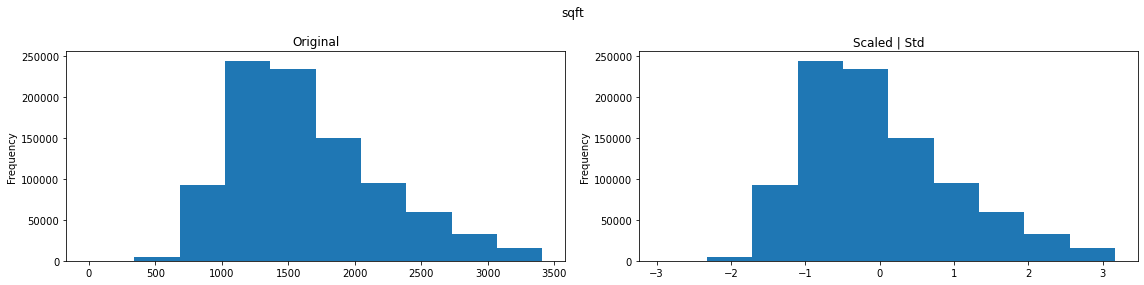

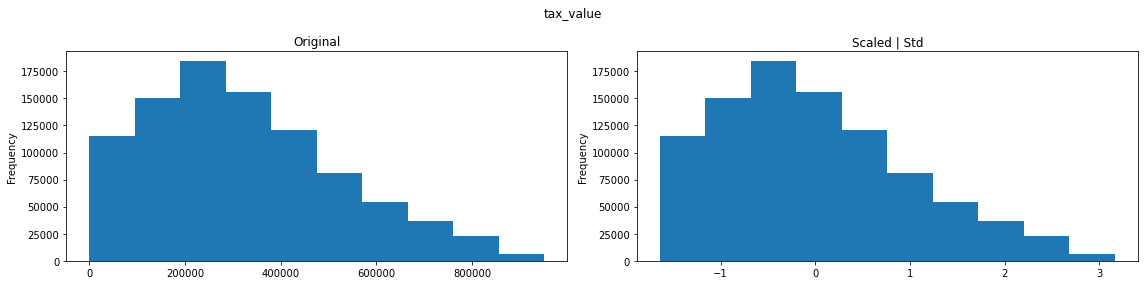

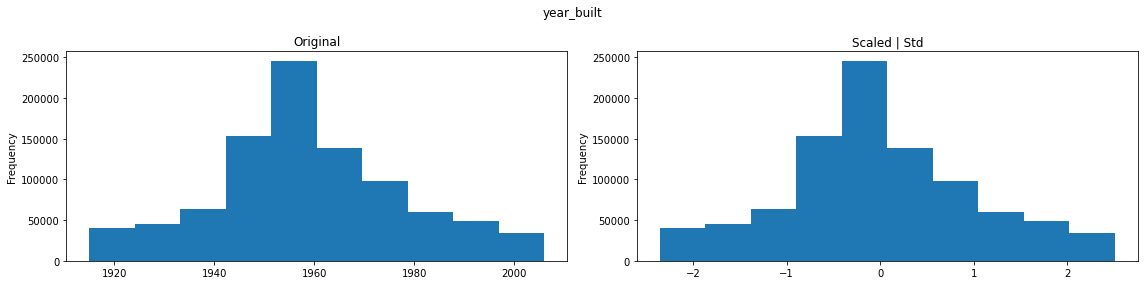

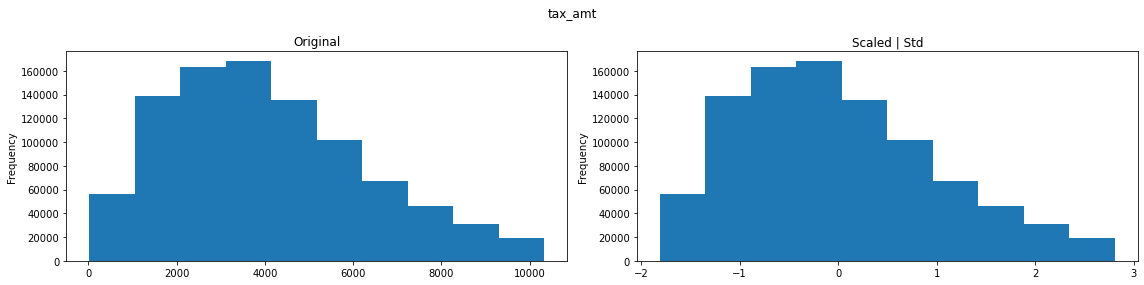

In [66]:
for col in cols_to_scale:

    plt.figure(figsize = (16, 4))
    # subplot 1
    plt.subplot(121)
    train[col].plot.hist(title = 'Original')
    
    # subplot 2
    plt.subplot(122)
    std_scaled_train[col].plot.hist(title = 'Scaled | Std')
    
    plt.suptitle(col)
    plt.tight_layout()
    plt.show()

### Robust Scaler

### Min - Max Scaler

In [67]:
ro_scaler = sklearn.preprocessing.RobustScaler()

In [68]:
# fitting scaler object to train dataset
ro_scaler = ro_scaler.fit(train[cols_to_scale])

In [69]:
# scaling data | train
ro_scaled_train = ro_scaler.transform(train[cols_to_scale])
# ro_scaled_train

# scaling data | validate
ro_scaled_validate = ro_scaler.transform(validate[cols_to_scale])
# ro_scaled_validate

# scaling data | test
ro_scaled_test = ro_scaler.transform(test[cols_to_scale])
# ro_scaled_test

In [70]:
# create new columns on train, validate, and test
ro_scaled_train = pd.DataFrame(ro_scaled_train, columns=cols_to_scale)
ro_scaled_train.head(2)

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt
0,0.0,0.0,-0.199192,-0.610767,0.000000,-0.698768
1,1.0,0.0,0.045760,-0.149877,-0.454545,-0.210492


#### Visualize Min - Max Scaler Results

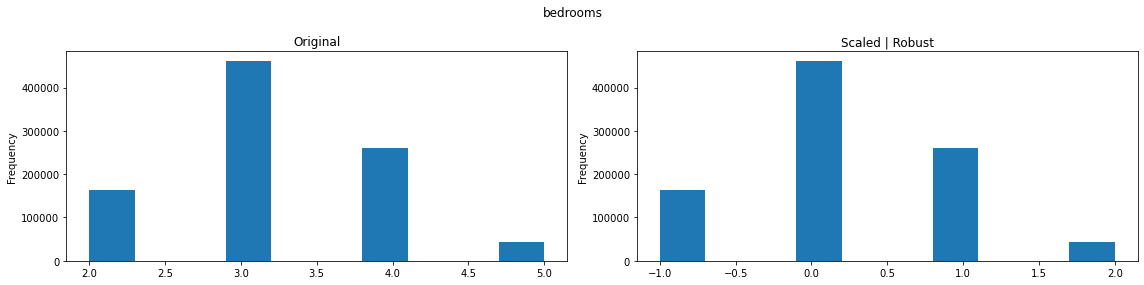

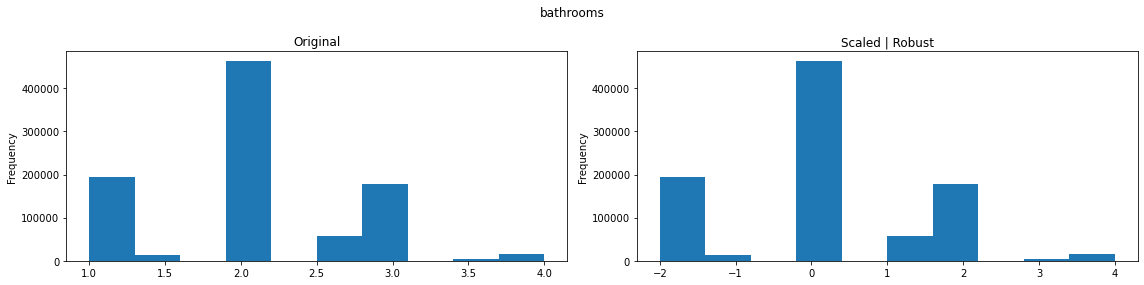

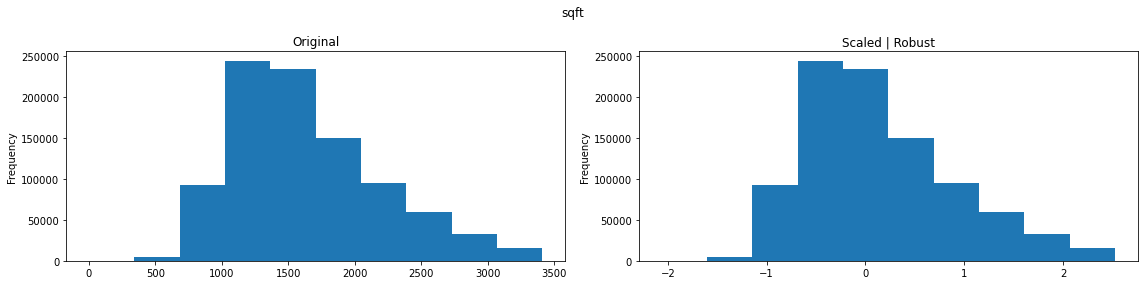

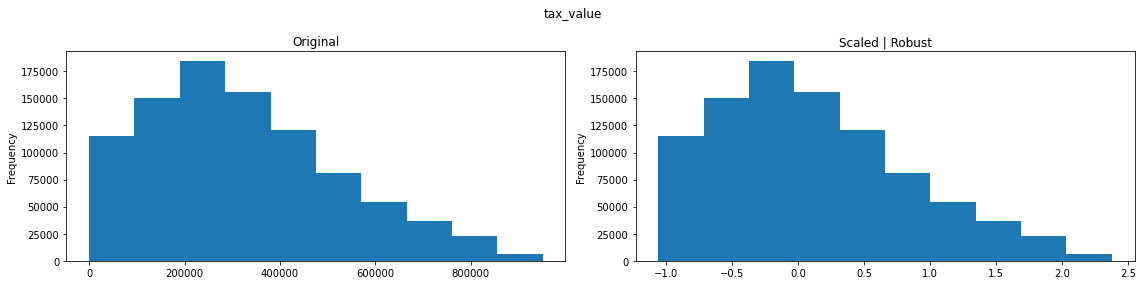

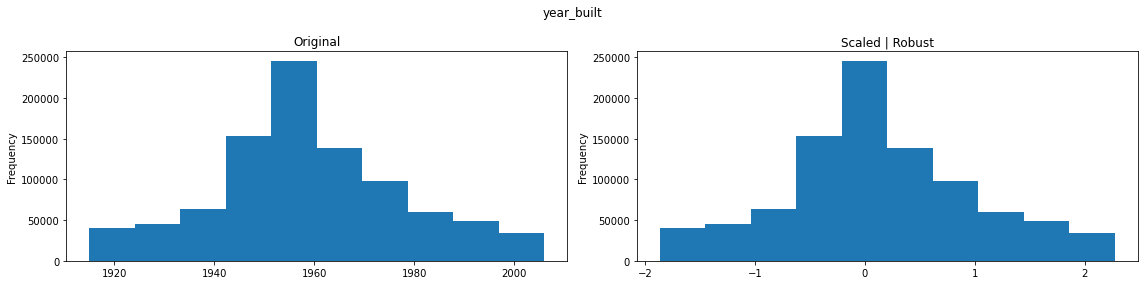

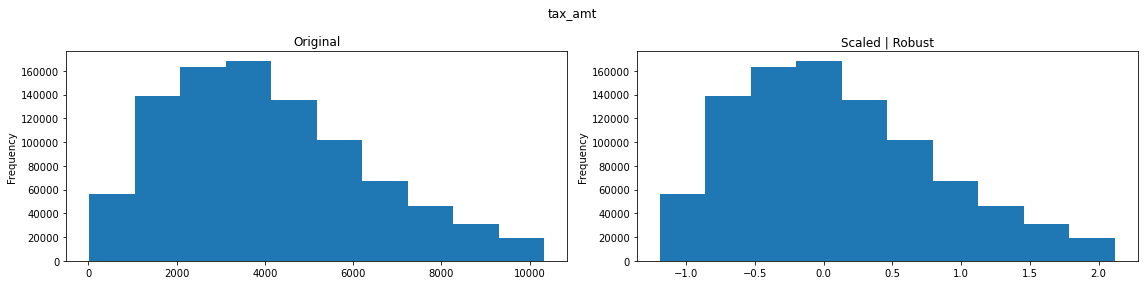

In [71]:
for col in cols_to_scale:

    plt.figure(figsize = (16, 4))
    # subplot 1
    plt.subplot(121)
    train[col].plot.hist(title = 'Original')
    
    # subplot 2
    plt.subplot(122)
    ro_scaled_train[col].plot.hist(title = 'Scaled | Robust')
    
    plt.suptitle(col)
    plt.tight_layout()
    plt.show()

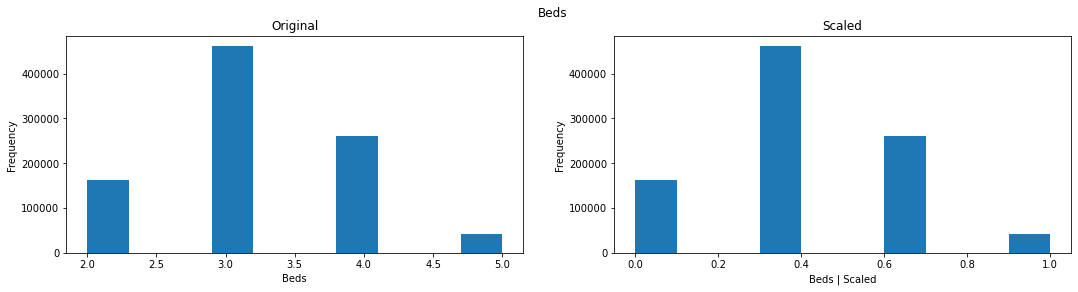

<Figure size 432x288 with 0 Axes>

In [52]:
plt.figure(figsize = (18, 4))

# subplot 1
plt.subplot(121)
train.bedrooms.plot.hist(title = 'Original')
plt.xlabel('Beds')

# subplot 2
plt.subplot(122)
scaled_train.bedrooms.plot.hist(title = 'Scaled')
plt.xlabel('Beds | Scaled')

plt.suptitle('Beds')
plt.show()
plt.tight_layout();

# 2. Apply the inverse_transform method to scaled data.
>Is the resulting data the same as original?

# 3. Read the documentation for sklearn's QuantileTransformer. 
>Use `normal` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.